<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

Original Vs New Dataset Structure


FileNotFoundError: No such file or directory: 'original vs new_dataset.png'

FileNotFoundError: No such file or directory: 'original vs new_dataset.png'

<IPython.core.display.Image object>

In [2]:
!pip  list

Package Version
------- -------
pip     24.2


In [3]:
dataset_dir = 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/final_antispoofing'
train_dataset_dir = 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/final_antispoofing/train'
test_dataset_dir = 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/final_antispoofing/test'

In [4]:
'''import os
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train/real')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train/spoof')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test/real')
os.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test/spoof')'''

"import os\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train/real')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train/spoof')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test/real')\nos.mkdir('C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test/spoof')"

In [5]:
train_dir='C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train'
test_dir = 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test'

<h3>Step 2 </h3>

In [3]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [62]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [65]:
#train_test_splits(data_directory=dataset_dir)

<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [6]:
import os

In [7]:
categories = ['real','spoof']

In [10]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 3325 images in real directory
There are 3338 images in spoof directory
There are 6663 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 65 images in real directory
There are 474 images in spoof directory
There are 539 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [11]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [12]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [13]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=6663)
print(training_image_path)
print(len(training_image_path))

['C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113249.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113251.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113253.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113254.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113259hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113317hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113324hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\20201110_113327hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/train\\real\\202

<h3>Training Dataset Visualization</h3>

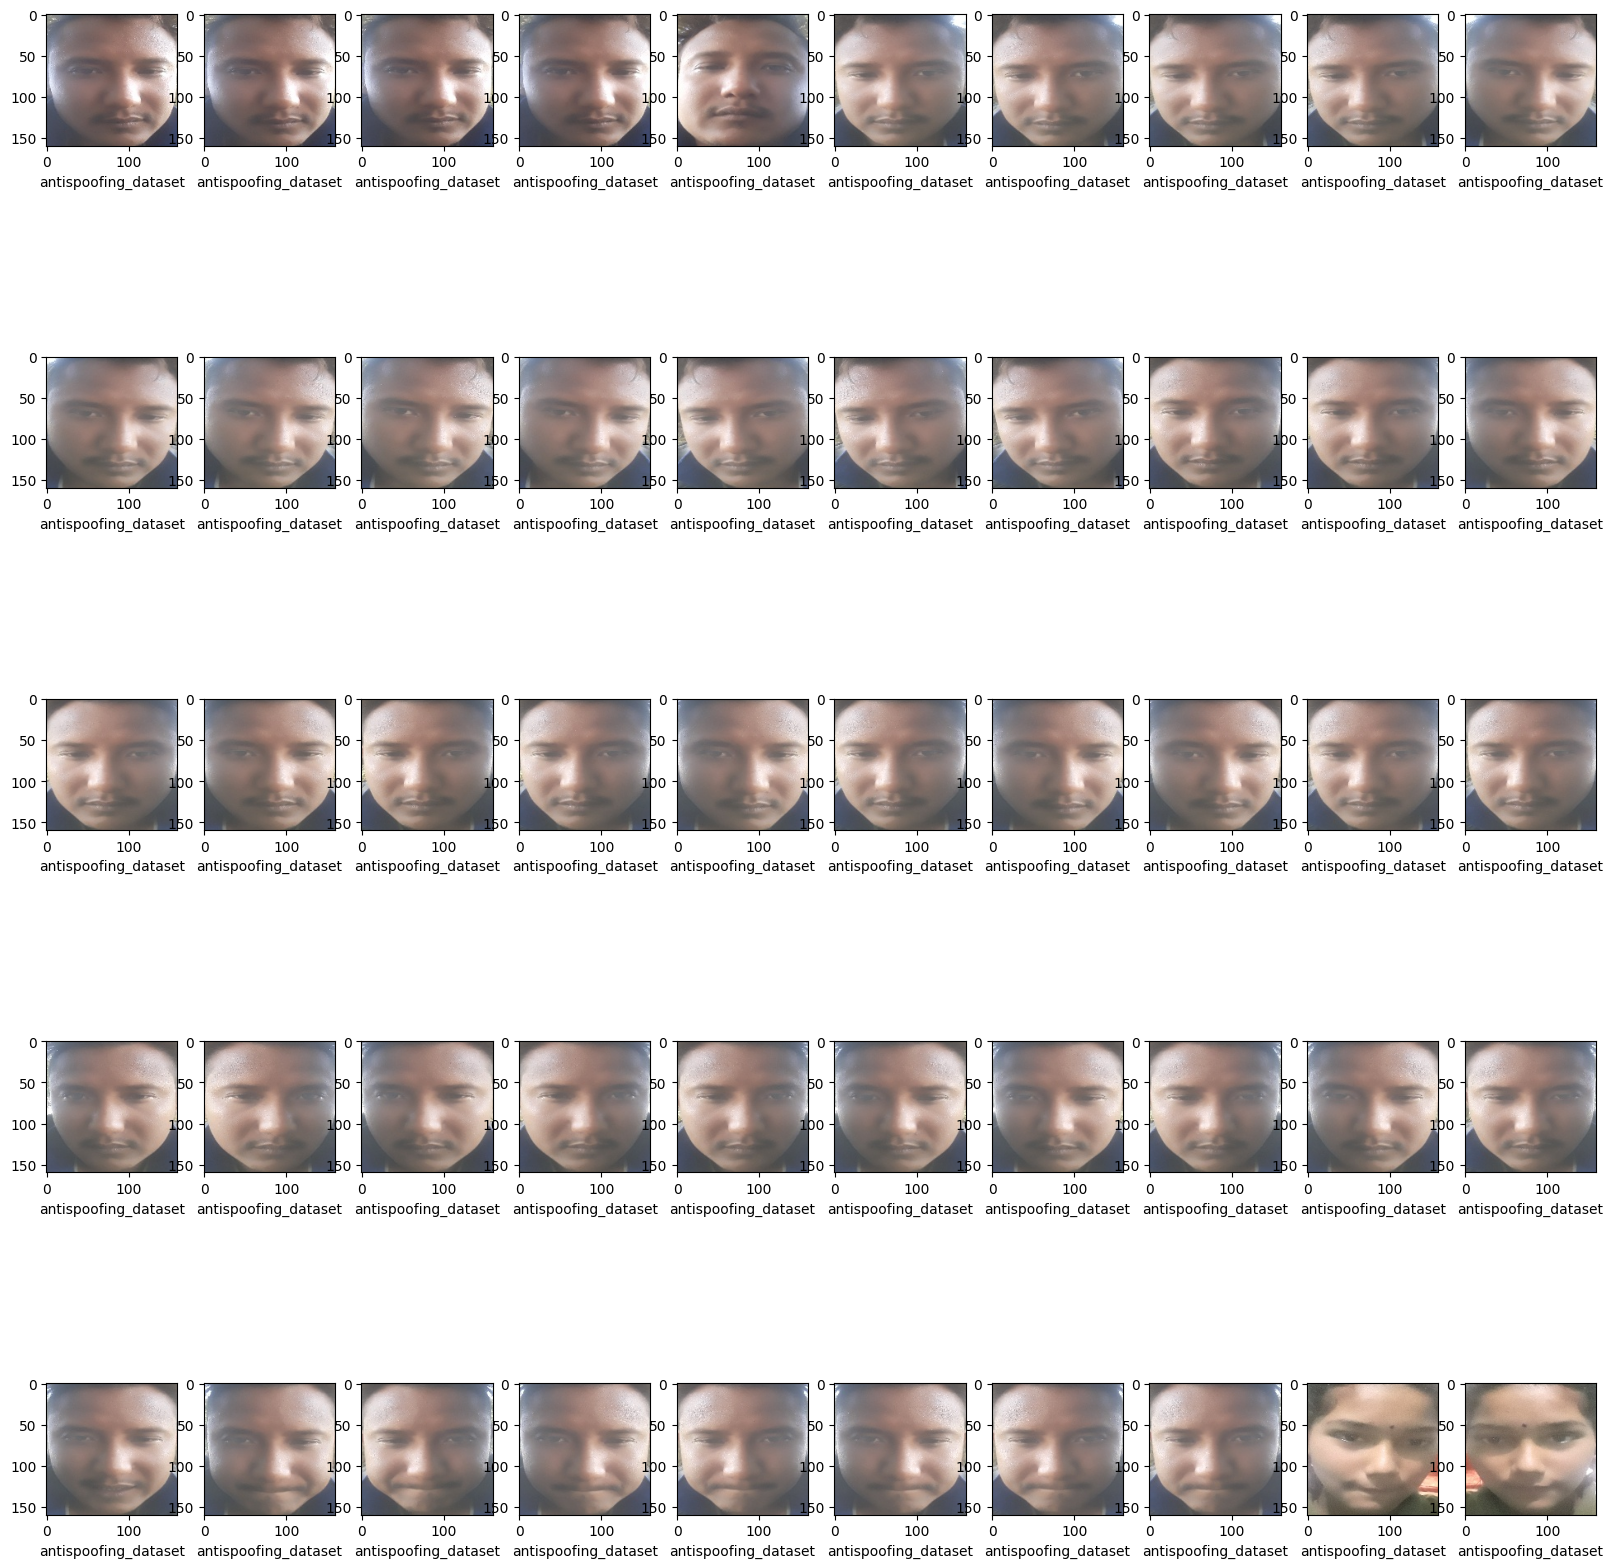

In [10]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [14]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=539)
print(testing_image_path)
print(len(testing_image_path))

['C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113245.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113259.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113320hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113342.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113455hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113509.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113513hr_flip.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113518.jpg', 'C:/Users/Mano Prasad/OneDrive/Desktop/orprpe/content/antispoofing_dataset/test\\real\\20201110_113524.jpg

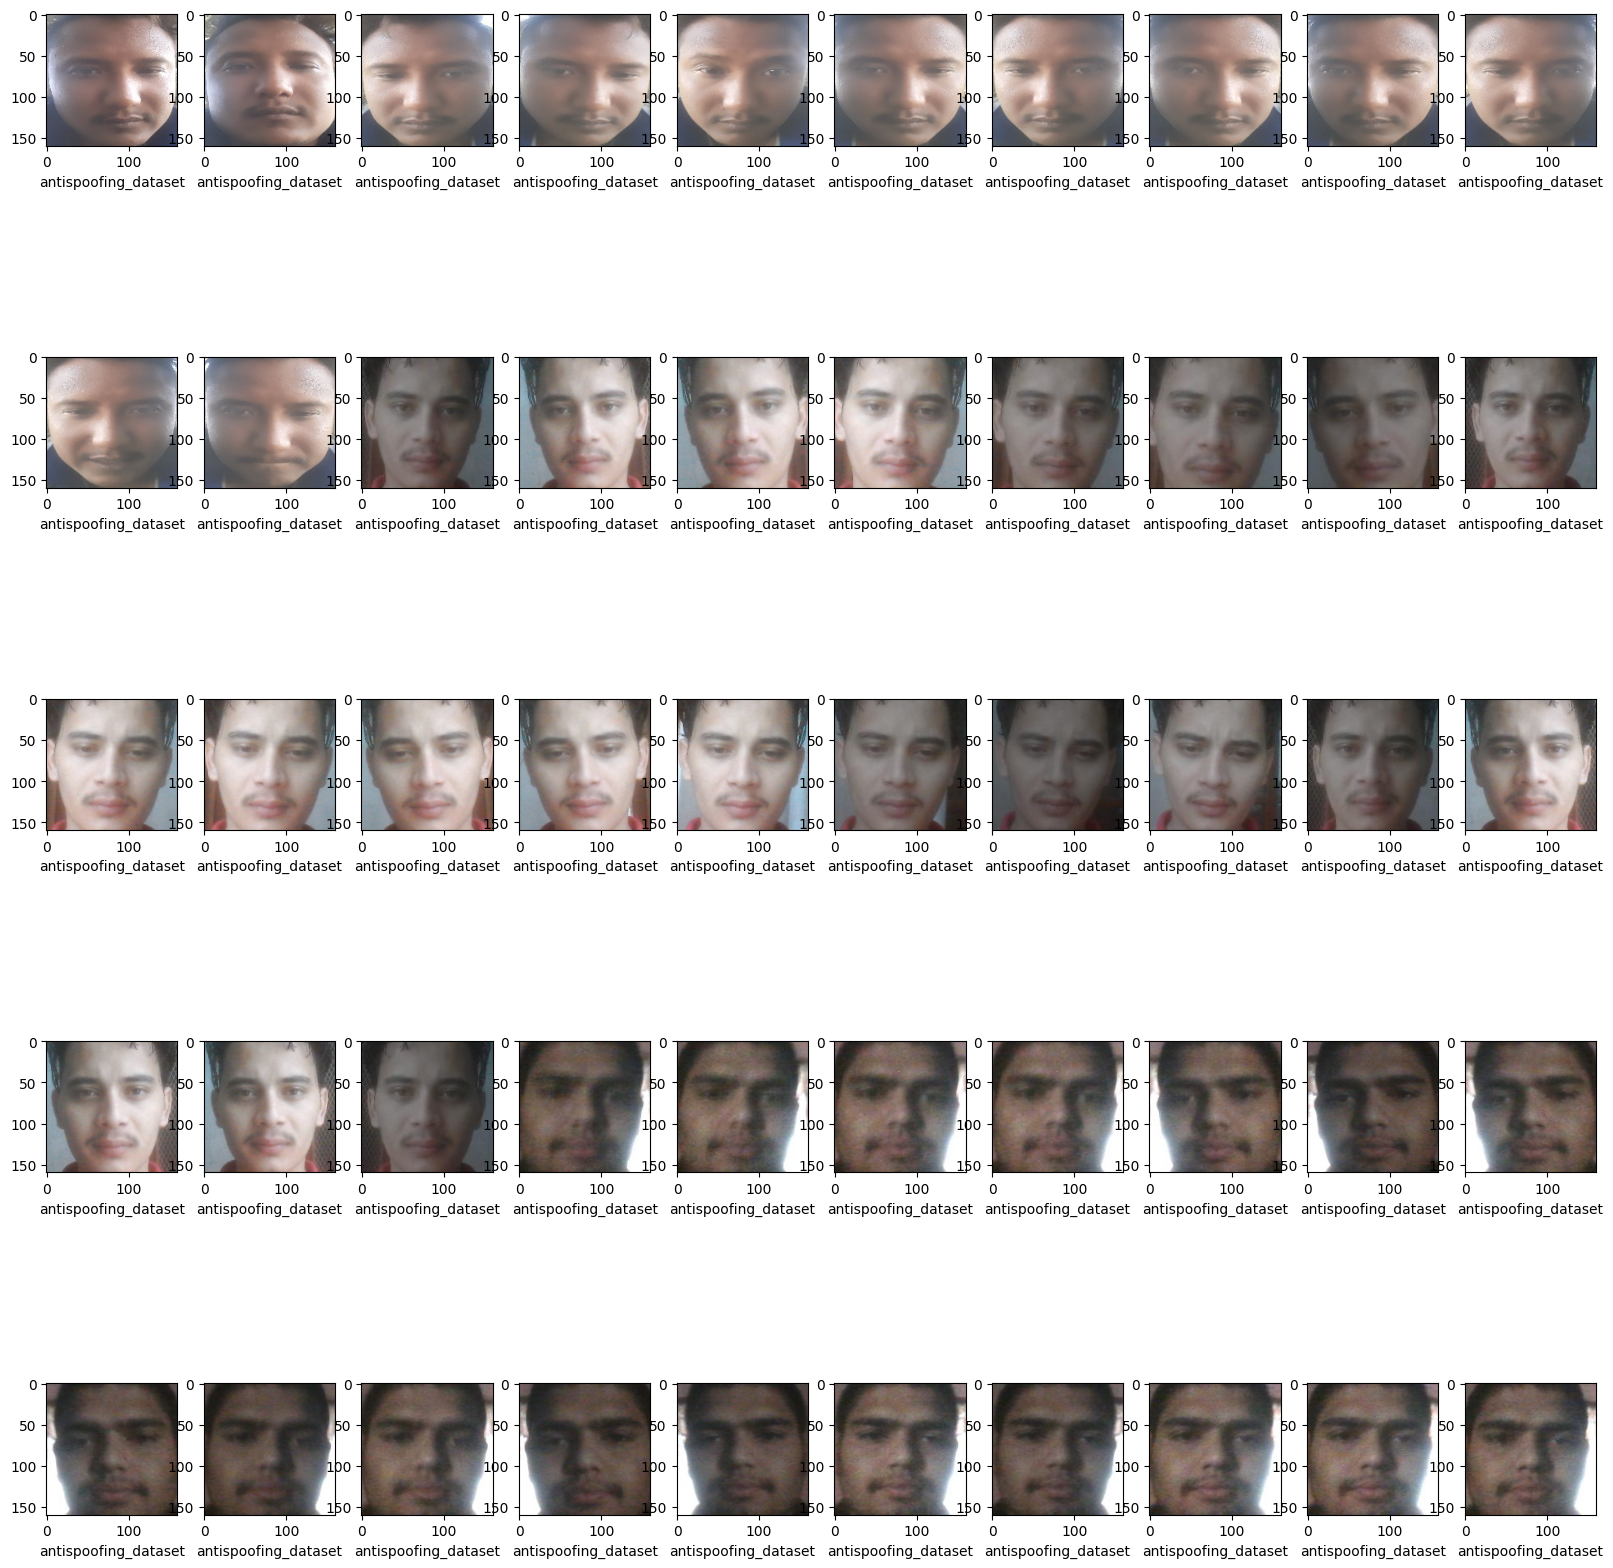

In [12]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [17]:
#pip install keras==2.6

  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mano Prasad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\Mano Prasad\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow-intel


In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.5.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\mano prasad\appdata\local\packages\pythonsoftwarefoundation.python.3.7_qbz5n2kfra8p0\localcache\local-packages\python37\site-packages
Requires: absl-py, termcolor, opt-einsum, typing-extensions, keras-preprocessing, numpy, protobuf, tensorflow-estimator, tensorboard, google-pasta, keras-nightly, h5py, astunparse, grpcio, flatbuffers, wheel, gast, six, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip list


Package                 Version
----------------------- ---------
absl-py                 2.1.0
astunparse              1.6.3
certifi                 2024.8.30
charset-normalizer      3.3.2
flatbuffers             24.3.25
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.66.1
h5py                    3.11.0
idna                    3.8
keras                   3.5.0
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              2.1.5
mdurl                   0.1.2
ml-dtypes               0.4.0
namex                   0.0.8
numpy                   1.26.4
opt-einsum              3.3.0
optree                  0.12.1
packaging               24.1
pip                     24.2
protobuf                4.25.4
Pygments                2.18.0
requests                2.32.3
rich                    13.8.0
setuptools              74.1.2
six                     1.16.0
tensorboard             2.17.1
tensorboard-data-serve

In [2]:
import tensorflow as tf

OSError: [WinError 126] The specified module could not be found

In [6]:
!pip uninstall tensorflow

^C


In [7]:
import tensorflow as tf

OSError: [WinError 126] The specified module could not be found

In [29]:
!pip install tensorflow keras

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6


In [36]:
!pip install --upgrade pip setuptools


   ---------------------------------------- 1.3/1.3 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1


In [39]:
!pip install tensorflow-gpu

^C


In [4]:
import tensorflow as tf 
print(tf.__version__)

OSError: [WinError 126] The specified module could not be found

In [2]:
!pip show tensorflow

In [34]:
!pip show protobuf


Name: protobuf
Version: 4.25.4
Summary: 
Home-page: https://developers.google.com/protocol-buffers/
Author: protobuf@googlegroups.com
Author-email: protobuf@googlegroups.com
License: 3-Clause BSD License
Location: C:\Users\Mano Prasad\anaconda3\Lib\site-packages
Requires: 
Required-by: streamlit, tensorboard, tensorflow-intel


In [5]:
!pip list

Package                 Version
----------------------- ---------
absl-py                 2.1.0
astunparse              1.6.3
certifi                 2024.8.30
charset-normalizer      3.3.2
flatbuffers             24.3.25
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.66.1
h5py                    3.11.0
idna                    3.8
keras                   3.5.0
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              2.1.5
mdurl                   0.1.2
ml-dtypes               0.4.0
namex                   0.0.8
numpy                   1.26.4
opt-einsum              3.3.0
optree                  0.12.1
packaging               24.1
pip                     24.2
protobuf                4.25.4
Pygments                2.18.0
requests                2.32.3
rich                    13.8.0
setuptools              74.1.2
six                     1.16.0
tensorboard             2.17.1
tensorboard-data-serve

In [1]:
!pip install tensorflow


^C


In [54]:
!pip install -U scipy

   ---------------------------------------- 44.5/44.5 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [62]:
!pip install torch --pre --extra-index-url https://download.pytorch.org/whl/nightly/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cu116


In [19]:
import sys

print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


Python version
3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 16:30:00) [MSC v.1900 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)


In [33]:
!pip install tensorflow==2.5.2



ERROR: Could not find a version that satisfies the requirement tensorflow==2.5.2 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.5.2


In [31]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


OSError: [WinError 126] The specified module could not be found

In [5]:
!pip install tensorflow

In [21]:
pip install keras==2.4.3

  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Mano Prasad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [23]:
import keras
print("Keras version:", keras.__version__)

OSError: [WinError 126] The specified module could not be found

In [9]:
pip install tensorflow==2.4.0

  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\mano prasad\\appdata\\local\\packages\\pythonsoftwarefoundation.python.3.7_qbz5n2kfra8p0\\localcache\\local-packages\\python37\\site-packages\\~5py\\defs.cp37-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\Mano Prasad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [10]:
import tensorflow


OSError: [WinError 126] The specified module could not be found

In [15]:

import tensorflow.keras
from tensorflow.keras.layers import Dense,Dropout,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import model_from_json
import json


OSError: [WinError 126] The specified module could not be found

In [22]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

OSError: [WinError 126] The specified module could not be found

<h4>Step 2 </h4>

In [55]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255),

In [56]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 6663 images belonging to 2 classes.


In [57]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 539 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [58]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

In [59]:
mobilenet.trainable = False

In [60]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [61]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

<h4>Step 4 Compiling the models </h4>

In [62]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [42]:
import os
os.mkdir('/content/model_weightsmainn/')

In [63]:
#model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)
model_checkpoint = ModelCheckpoint('./model_weightsmainn/newmodel_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.weights.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True)

In [64]:
print(train_generator.samples)
print(valid_generator.samples)


6663
539


In [65]:
import tensorflow as tf
print(tf.__version__)  # Check TensorFlow version
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.5.2
Num GPUs Available:  0


In [66]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [67]:
!pip install tensorflow-gpu==2.5.2


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.5.2 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.5.2


In [68]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // 25,
    epochs=100,
    callbacks=[model_checkpoint]
)

OSError: [WinError 126] The specified module could not be found

In [50]:
!pip install tensorflow-gpu
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("GPU is not detected.")

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
GPU is not detected.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Mano Prasad\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Mano Prasad\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Mano Prasad\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Mano Prasad\anaconda3\Lib\sit

In [127]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet1.json", "w") as json_file:
    json_file.write(model_json)

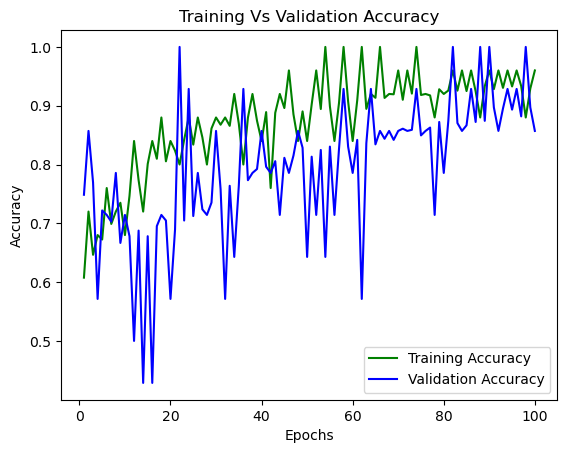

In [129]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

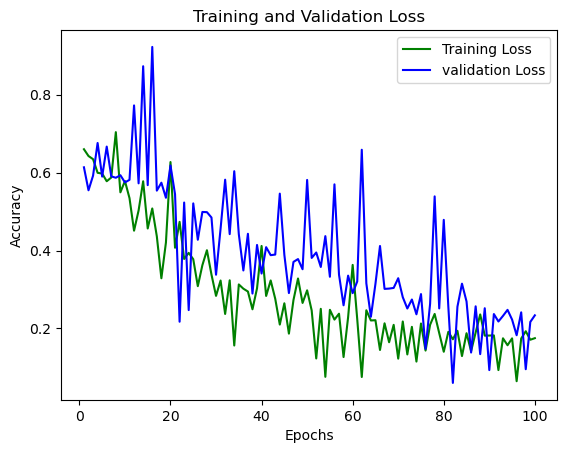

In [130]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [132]:
check_fakes(test_dir,categories[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

{'spoof': 418, 'real': 56}

In [133]:
check_fakes(test_dir,categories[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

{'real': 65}

In [103]:
(19+6)/(19+455+471+6)*100

2.6288117770767614

In [104]:
100-2.6288

97.3712

In [5]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# Load model architecture from the JSON file
with open('finalyearproject_antispoofing_model_mobilenet.json', 'r') as json_file:
    model_json = json_file.read()
    
model = model_from_json(model_json)

# Load weights into the model
model.load_weights('finalyearproject_antispoofing_model_82-1.000000.weights.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\MANOPR~1\AppData\Local\Temp\tmp5fw_bfzf\assets


INFO:tensorflow:Assets written to: C:\Users\MANOPR~1\AppData\Local\Temp\tmp5fw_bfzf\assets


Saved artifact at 'C:\Users\MANOPR~1\AppData\Local\Temp\tmp5fw_bfzf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2123284475600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284474256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284477712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284476368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284476176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284478672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284479248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284479824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284478480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284477520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2

In [6]:
len(tflite_model)

9884216

In [7]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# Load model architecture from the JSON file
with open('finalyearproject_antispoofing_model_mobilenet.json', 'r') as json_file:
    model_json = json_file.read()
    
model = model_from_json(model_json)

# Load weights into the model
model.load_weights('finalyearproject_antispoofing_model_82-1.000000.weights.h5')

# Convert the model to TensorFlow Lite format
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
# Save the converted TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)



INFO:tensorflow:Assets written to: C:\Users\MANOPR~1\AppData\Local\Temp\tmpzbcjgah3\assets


INFO:tensorflow:Assets written to: C:\Users\MANOPR~1\AppData\Local\Temp\tmpzbcjgah3\assets


Saved artifact at 'C:\Users\MANOPR~1\AppData\Local\Temp\tmpzbcjgah3'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2123284475600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284474256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284477712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284476368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284476176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284478672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284479248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284479824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284478480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2123284477520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2

In [8]:
len(tflite_quant_model)

2758264

In [9]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)


In [4]:
import tensorflow as tf

# Define your model architecture here
model = 'finalyearproject_antispoofing_model_mobilenet.json'

# Load weights into the model
model.load_weights('finalyearproject_antispoofing_model_82-1.000000.weights.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


AttributeError: 'str' object has no attribute 'load_weights'

In [2]:
import tensorflow as tf

# Load your Keras model from the .h5 file
model = tf.keras.models.load_model('finalyearproject_antispoofing_model_82-1.000000.weights.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


ValueError: No model config found in the file at finalyearproject_antispoofing_model_82-1.000000.weights.h5.

In [1]:
tf.lite.TFLiteConvertor.from_saved_model("finalyearproject_antispoofing_model_82-1.000000.weights.h5")
tflite_model=converter.convert()

NameError: name 'tf' is not defined

In [ ]:
import sys
print(sys.version)


: 